Coefficient/slope: [[1.99720057]]
Intercept: [-4.97835704]


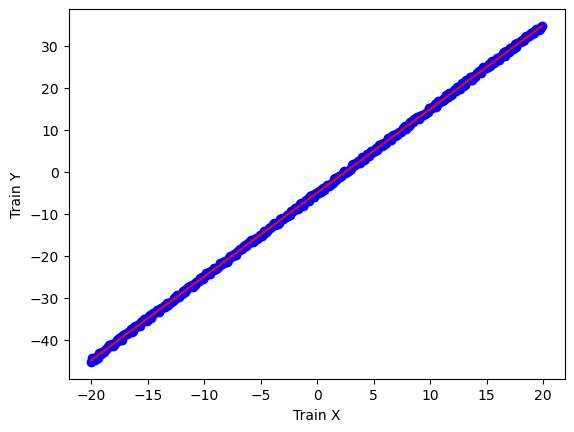

Predicted from [[8]] is [[10.99924753]].


In [1]:
import pandas as pd
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3 as sql
from sklearn import linear_model
import os
import matplotlib.pyplot as plt
import numpy as np

def regression(test_data, reg):
    print("Predicted from {} is {}.".format(test_data, reg.predict(test_data)))

def main():
    #Error handling when creating the engine to SQLite
    try:
        engine = create_engine('sqlite:///test.db', echo=False)
    except:
        print("Failed to create engine.")

    #Read data from csv file and store it to dataframe
    train_df = pd.read_csv(os.path.join(os.getcwd(), "train.csv"))
    #Create new table in SQLite based on dataframe
    train_df.to_sql('train_table',con=engine, index=False, if_exists='replace')

    #regress to train the data
    train_x = np.asanyarray(train_df[['x']])
    train_y = np.asanyarray(train_df[['y1']])
    global reg
    reg = linear_model.LinearRegression()
    reg.fit(train_x, train_y)

    coef = reg.coef_
    intercept = reg.intercept_

    print('Coefficient/slope: {}'.format(coef))
    print('Intercept: {}'.format(intercept))

    #plotting the training data with regression result
    plt.scatter(train_df.iloc[:,0], train_df.iloc[:,1], color='blue')
    plt.plot(train_x, coef * train_x + intercept, color='red')
    plt.xlabel('Train X')
    plt.ylabel('Train Y')
    plt.show()
    
    #regression to predict - best candidate for the function
    test_data = [[8]]
    regression(test_data,reg)

if __name__ == "__main__":
    main()